In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json
import re

In [3]:
def plot_seconds_for_network(trainer, rule_type, results):
    rule_values = sorted(list(set([result['rule_value'] for result in results if result['rule_type'] == rule_type and result['trainer'] == trainer])))
    
    print(rule_values)
    seconds = np.zeros(len(rule_values))
    
    regex = re.compile(r'0: Memory Usage: \d+\.\d+, Training Duration: (\d+\.\d+)')

    for result in results:
        if result['rule_type'] == rule_type and result['trainer'] == trainer:
            seconds[rule_values.index(result['rule_value'])] += float(regex.search(result['stderr']).group(1))
    
    plt.scatter(rule_values, seconds)


#     ax.set_yticks(np.arange(len(batch_size)))
#     ax.set_xticks(np.arange(len(nodes)))

#     ax.set_yticklabels(batch_size)
#     ax.set_xticklabels(nodes)
    
#     ax.set_ylabel('# of batch_size')
#     ax.set_xlabel('# of nodes')

#     for i in range(len(batch_size)):
#         for j in range(len(nodes)):
#             text = ax.text(
#                 j, 
#                 i, 
#                 f'{seconds[i, j]:.1f}',
#                 ha="center", 
#                 va="center", 
#                 color="black"
#             )

#     ax.set_title(f'Training time ({trainer})')
#     fig.tight_layout()
#     plt.show()
#     fig.savefig(f'training_time_{trainer}.png')

In [4]:
with open('results_network.json') as f:
    results = json.load(f)['results']

[0, 1, 2, 5, 10, 25, 50, 100, 200, 300, 400]


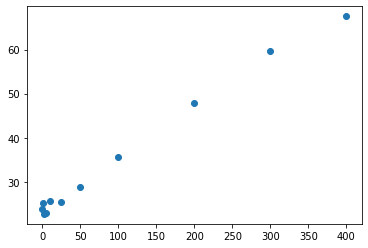

In [5]:
plot_seconds_for_network('distributed', 'delay', results)

[0, 1, 2, 5, 10, 25, 50, 100, 200, 300, 400]


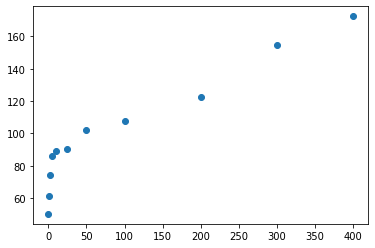

In [6]:
plot_seconds_for_network('horovod', 'delay', results)

[0, 0.1, 0.5, 1, 2, 5, 10, 15]


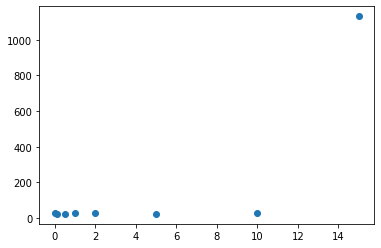

In [7]:
plot_seconds_for_network('distributed', 'loss', results)

[0, 0.1, 0.5, 1, 2, 5, 10, 15]


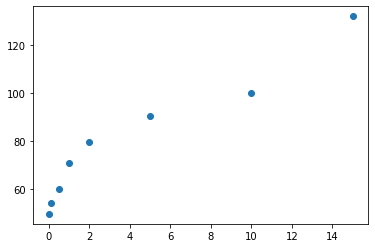

In [8]:
plot_seconds_for_network('horovod', 'loss', results)